# Step 1: Import libraries and Load Data

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Normalization

In [2]:
# Normalize Pixel values and convert labels to one-hot encoding
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

## Data Augmentation

In [3]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1,
    fill_mode='nearest'

)
datagen.fit(x_train)

# Modify Pre-trained Model

In [4]:
# Load MObileNetV2 without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base_model
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) # New FC layer, random init
predictions = Dense(100, activation='softmax')(x) # New Softmax layer

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)


<ipython-input-4-08fe3383df58>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Compile the model

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.2566 - loss: 2.1473 - val_accuracy: 0.3169 - val_loss: 1.8761
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2812 - loss: 1.8307

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2812 - loss: 1.8307 - val_accuracy: 0.3191 - val_loss: 1.8740
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 69s 23ms/step - accuracy: 0.3113 - loss: 1.8862 - val_accuracy: 0.3415 - val_loss: 1.8273
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3125 - loss: 1.9376 - val_accuracy: 0.3404 - val_loss: 1.8282
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3281 - loss: 1.8562 - val_accuracy: 0.3444 - val_loss: 1.8159
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2500 - loss: 2.1575 - val_accuracy: 0.3448 - val_loss: 1.8152
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3278 - loss: 1.8437 - val_accuracy: 0.3484 - val_loss: 1.8213
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3438 - loss: 2.2290 - val_accuracy: 0.3487 - val_loss: 1.8208
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.3367 - loss: 1.8220 - val

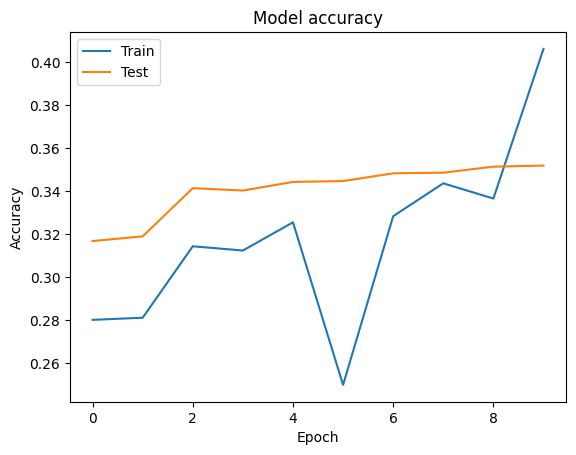

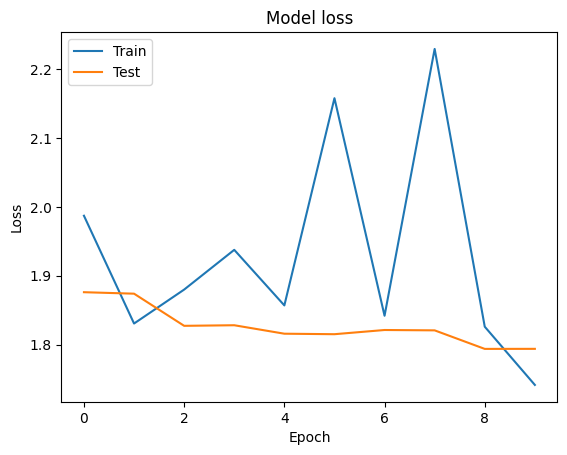

In [6]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Fine Tuning

In [9]:
# Unfreeze some layers in the base model
base_model.trainable = True
fine_tune_at = 100  # This is the number of layers from the top to freeze
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                         steps_per_epoch=len(x_train) // 32, epochs=20,
                         validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 73s 34ms/step - accuracy: 0.5638 - loss: 1.2505 - val_accuracy: 0.6251 - val_loss: 1.0809
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 0.8872 - val_accuracy: 0.6249 - val_loss: 1.0809
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5901 - loss: 1.1710 - val_accuracy: 0.6442 - val_loss: 1.0239
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4375 - loss: 1.4417 - val_accuracy: 0.6438 - val_loss: 1.0240
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6051 - loss: 1.1324 - val_accuracy: 0.6569 - val_loss: 0.9873
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6875 - loss: 0.9560 - val_accuracy: 0.6568 - val_loss: 0.9874
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6199 - loss: 1.0911 - val_accuracy: 0.6796 - val_loss: 0.9574
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7188 - loss: 1

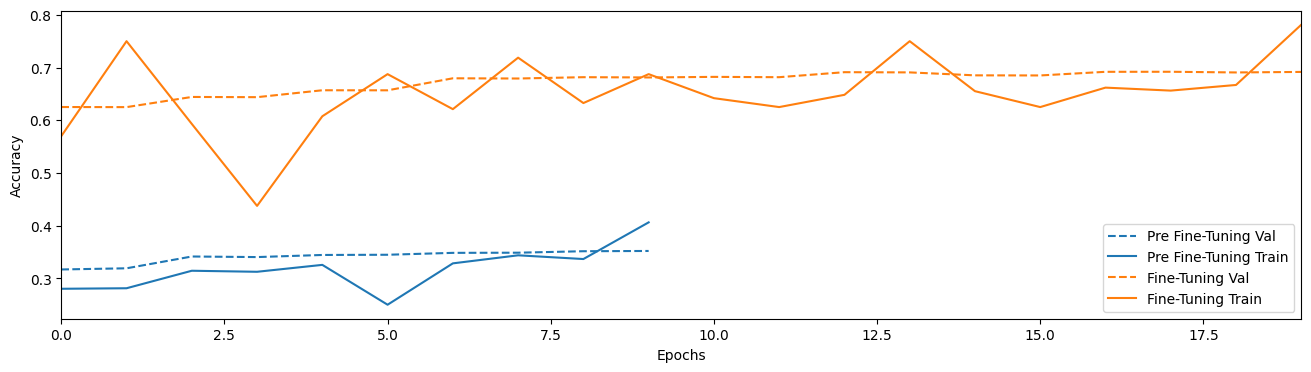

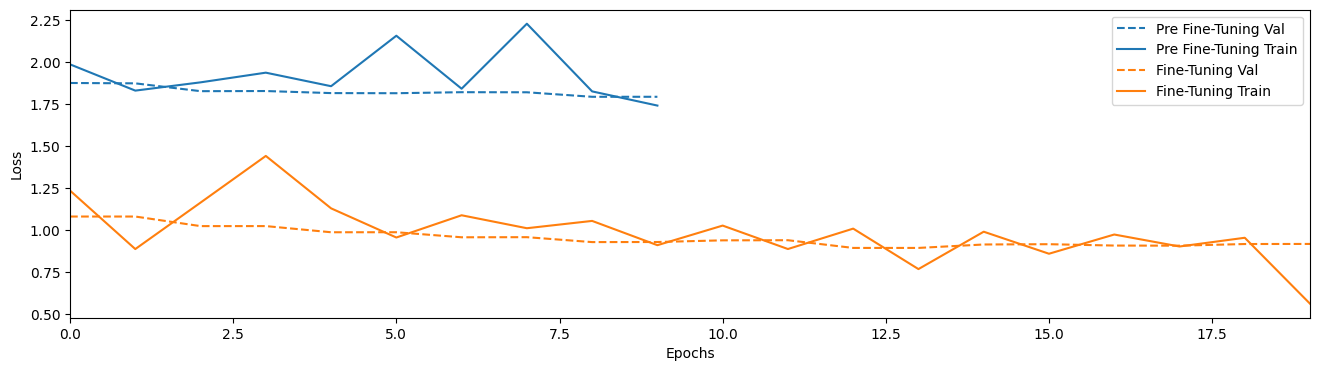

In [10]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 4))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Plot accuracy
plot_history([('Pre Fine-Tuning', history),
              ('Fine-Tuning', history_fine)],
             key='accuracy')

# Plot loss
plot_history([('Pre Fine-Tuning', history),
              ('Fine-Tuning', history_fine)],
             key='loss')